In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip leapgestrecog.zip

# Import Required Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Data Loading and Pre-processing

In [ ]:
categories = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
img_size = 50

data_path = "/content/leapGestRecog"

In [ ]:
image_data = []

for dr in os.listdir(data_path):
  for category in categories:
    class_index = categories.index(category)
    path = os.path.join(data_path, dr, category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (img_size, img_size))
        image_data.append([img_array, class_index])
      except Exception as e:
        pass
image_data[0]

[array([[5, 4, 5, ..., 4, 5, 5],
        [5, 5, 5, ..., 3, 5, 3],
        [5, 5, 5, ..., 5, 4, 3],
        ...,
        [5, 4, 5, ..., 4, 5, 5],
        [3, 5, 5, ..., 4, 5, 4],
        [4, 4, 5, ..., 4, 4, 3]], dtype=uint8),
 0]

In [ ]:
import random
random.shuffle(image_data)

In [ ]:
input_data = []
labels = []

for x, y in image_data:
  input_data.append(x)
  labels.append(y)

In [ ]:
print(labels[0:10])

[6, 7, 9, 0, 6, 2, 1, 0, 6, 0]


# Data Visualization

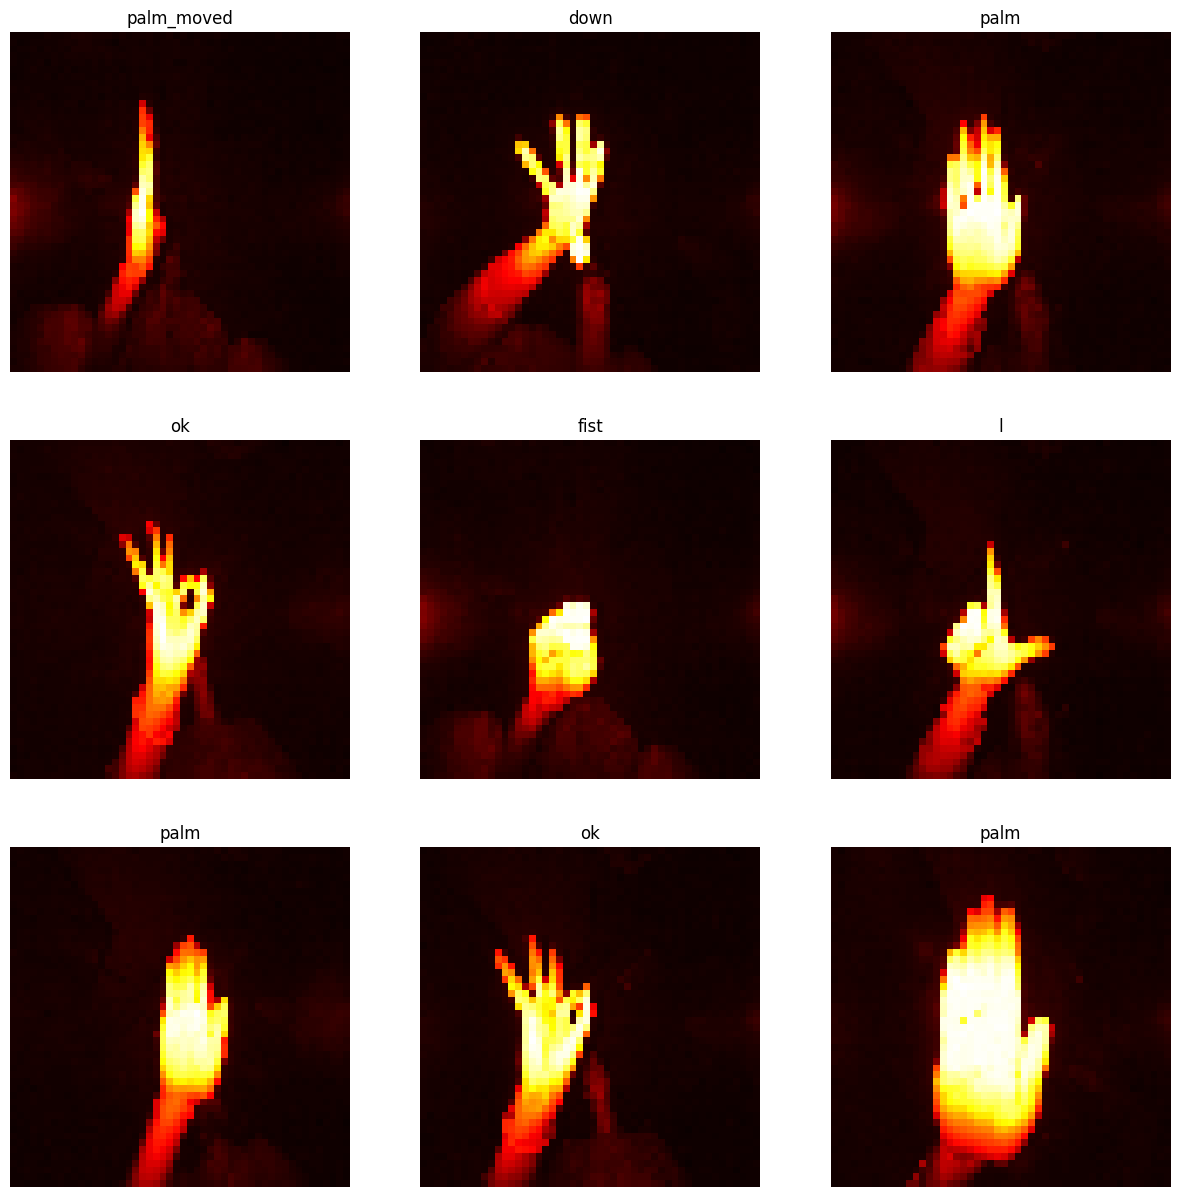

In [ ]:
plt.figure(1, figsize = (15, 15))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(input_data[i], cmap = 'hot')
  plt.title(categories[labels[i]][3:])
  plt.axis('off')
plt.show()

In [ ]:
input_data = np.array(input_data)
labels = np.array(labels)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [ ]:
labels = keras.utils.to_categorical(labels, num_classes=10, dtype = 'i1')
labels[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [ ]:
input_data.shape = (-1, img_size, img_size, 1)

In [ ]:
input_data.shape

(20000, 50, 50, 1)

# Spliting data into training and testing


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, labels, test_size = 0.3, random_state = 0)

# Model Architecture

In [ ]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_data.shape[1:]))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Model Traning

In [ ]:
model.fit(x_train, y_train, epochs = 7, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/7
438/438 [==============================] - 5s 9ms/step - loss: 0.3294 - accuracy: 0.8997 - val_loss: 0.0376 - val_accuracy: 0.9868
Epoch 2/7
438/438 [==============================] - 3s 7ms/step - loss: 0.0251 - accuracy: 0.9929 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 3/7
438/438 [==============================] - 3s 7ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 4/7
438/438 [==============================] - 3s 8ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 5/7
438/438 [==============================] - 3s 6ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 6/7
438/438 [==============================] - 3s 7ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 9.8758e-04 - val_accuracy: 0.9998
Epoch 7/7
438/438 [==============================] - 3s 6ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.0028 - val_accuracy: 0.9993


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 11, 11, 64)       

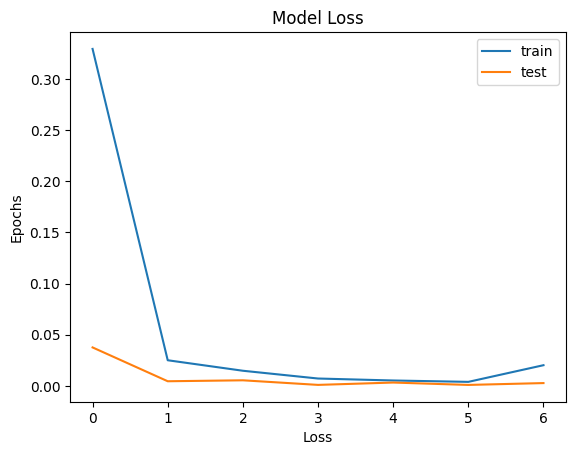

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend(['train', 'test'])
plt.show()

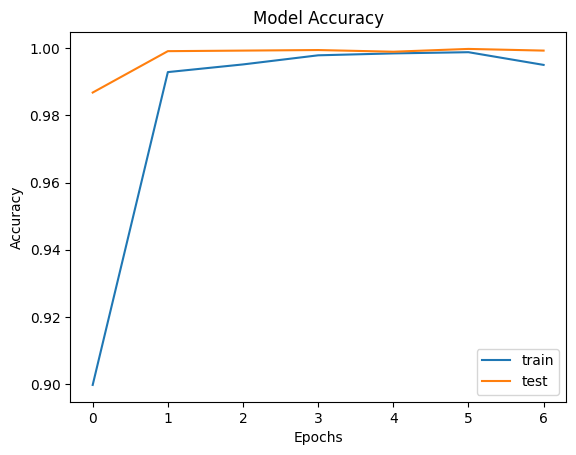

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'])

# Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:{:2.2f}% " .format(test_acc*100))

188/188 [==============================] - 1s 4ms/step - loss: 0.0028 - accuracy: 0.9993
Test Accuracy:99.93% 


# Confusion Matrix

188/188 [==============================] - 1s 3ms/step


[]

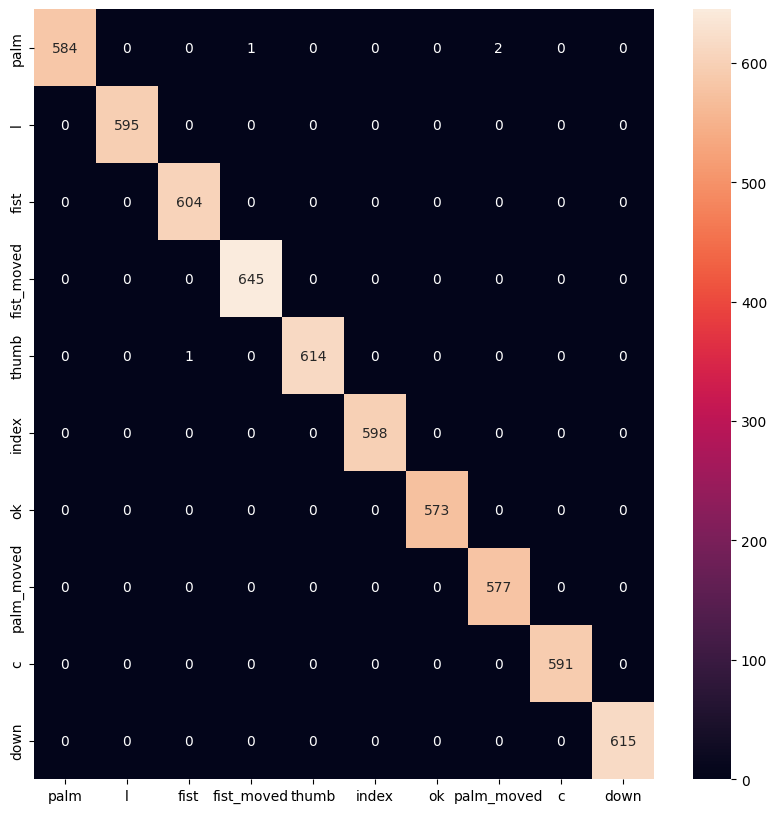

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
z = [c[3:] for c in categories]
plt.figure(figsize = (10, 10))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(model.predict(x_test), axis = 1))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = z, yticklabels = z)
plt.plot()

#Conclusion:
In summary, we developed a highly accurate hand gesture recognition system using Convolutional Neural Networks (CNNs) and advanced preprocessing techniques. Achieving a remarkable 99.93% test accuracy, this project demonstrates the model's precision and effectiveness. Leveraging Python, Keras, and TensorFlow, the system promises seamless human-computer interaction, marking a significant step towards intuitive gesture-based control systems in diverse applications.